# <p style="text-align: center;"> The Ultimate Hero Quest aka 2012-2020 Amazon spendings analysis</p>

## Applying CRISP-DM framework:
1. Business Understanding: [defining a set of questions](#s1)
2. [Data Understanding](#s2)
3. [Data Preparation](#s3)
4. [Data Modeling](#s4) along with Result Evaluation
5. [Deployment](#k2)

## 1. Business Understanding  <a name="s1"></a> 
**Defining a set of questions**:
* [How much did I spend by year?](#s5) [What year did I go on a shopping spree and spent the most?](#s6) Note that we're not asking why as that would require a therapy session or two (or a dozen).
* [What was purchased during that binge-shopping year?](#s7)
* [Which categories most of my expenses fall into?](#i2)
* [If we pick top 6 categories, do I tend to spend the same amount of money every year?](#i1)
* [The most dreadful question, what is the maximum amount I ever spent on each expense category?](#i3)
* [Lastly, what is my predicted purchase total for 2021?](#k1)

## 2. Data Understanding  <a name="s2"></a> 
Here we are going to **explore the available data.**

<h4><p style="text-align: center;">Loading libraries</p></h4>

In [1]:
#importing pandas along with display options 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#numpy and data visualisation librarires 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sklearn for our first predictive model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict

#statsmodels for </h4>our second predictive model
import statsmodels.api as sm;

#getting rid of warnings
import warnings
warnings.filterwarnings('ignore')
#a better way might be to set warnings.filterwarnings(action='once')


<h4> <p style="text-align: center;"> Gathering and exploring data</p></h4>

In [110]:
df = pd.read_csv('/Users/tatianatikhonova/Documents/DS projects/Amazon/01-Jan-2012_to_02-Jan-2021 (1).csv')

In [111]:
df.drop(['Shipping Address Street 1','Ordering Customer Email'],axis=1,inplace=True)
df.head()

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Shipment Date,Shipping Address Name,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,09/01/12,103-1139869-5053044,Oster OGG3701 .7-Cubic Foot 700-Watt Digital M...,MICROWAVE_OVEN,B003MGJ17W,52141502.0,Amazon.com,NaN,new,NaN,NaN,$99.99,$75.95,1,Visa - 8154,NaN,NaN,09/04/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,UPS(1Z5932560354547139),$75.95,$0.00,$75.95,NaN,NaN,NaN,Tatiana,USD,NaN
1,09/01/12,103-3853417-2197020,NaN,NaN,B004T3C9LW,NaN,Amazon.com,NaN,new,toolboxsupply,NaN,$8.39,$8.39,1,Visa - 8154,NaN,NaN,09/06/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,FedEx(350429315863582),$8.39,$0.74,$9.13,NaN,NaN,NaN,Tatiana,USD,NaN
2,09/01/12,103-4722613-4495433,Betty Dain Hipster Collection Mold Resistant S...,CURTAIN,B00385WMIM,53131600.0,Amazon.com,NaN,new,Amazon.com,NaN,$4.95,$4.57,1,Visa - 8154,NaN,NaN,09/05/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,USPS(9102901001298424830061),$4.57,$0.41,$4.98,NaN,NaN,NaN,Tatiana,USD,NaN
3,09/01/12,103-4722613-4495433,Munchkin Five Multi Cups,DRINKING_CUP,B0035ER4WU,56101800.0,Amazon.com,NaN,new,Amazon.com,NaN,$4.99,$3.99,1,Visa - 8154,NaN,NaN,09/05/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,USPS(9102901001298424830061),$3.99,$0.35,$4.34,NaN,NaN,NaN,Tatiana,USD,NaN
4,09/01/12,103-4722613-4495433,Ecolution Kitchen Extras Eco-Friendly Mini Coo...,KITCHEN,B005M8GFGI,52150000.0,Amazon.com,NaN,new,Amazon.com,NaN,$19.99,$19.99,1,Visa - 8154,NaN,NaN,09/04/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,FEDEX(9611804837105428061049),$19.99,$1.77,$21.76,NaN,NaN,NaN,Tatiana,USD,NaN


In [112]:
df.shape

(1776, 34)

In [113]:
list(df.columns)

['Order Date',
 'Order ID',
 'Title',
 'Category',
 'ASIN/ISBN',
 'UNSPSC Code',
 'Website',
 'Release Date',
 'Condition',
 'Seller',
 'Seller Credentials',
 'List Price Per Unit',
 'Purchase Price Per Unit',
 'Quantity',
 'Payment Instrument Type',
 'Purchase Order Number',
 'PO Line Number',
 'Shipment Date',
 'Shipping Address Name',
 'Shipping Address Street 2',
 'Shipping Address City',
 'Shipping Address State',
 'Shipping Address Zip',
 'Order Status',
 'Carrier Name & Tracking Number',
 'Item Subtotal',
 'Item Subtotal Tax',
 'Item Total',
 'Tax Exemption Applied',
 'Tax Exemption Type',
 'Exemption Opt-Out',
 'Buyer Name',
 'Currency',
 'Group Name']

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Order Date                      1776 non-null   object 
 1   Order ID                        1776 non-null   object 
 2   Title                           1653 non-null   object 
 3   Category                        1653 non-null   object 
 4   ASIN/ISBN                       1776 non-null   object 
 5   UNSPSC Code                     1653 non-null   float64
 6   Website                         1776 non-null   object 
 7   Release Date                    31 non-null     object 
 8   Condition                       1776 non-null   object 
 9   Seller                          1759 non-null   object 
 10  Seller Credentials              9 non-null      object 
 11  List Price Per Unit             1776 non-null   object 
 12  Purchase Price Per Unit         17

In [115]:
df.describe()

,UNSPSC Code,Quantity,Purchase Order Number,PO Line Number,Tax Exemption Type,Group Name
count,1.653000e+03,1776.000000,0.0,0.0,0.0,0.0
mean,4.717474e+07,1.057432,NaN,NaN,NaN,NaN
std,1.266531e+07,0.334110,NaN,NaN,NaN,NaN
min,1.000000e+07,0.000000,NaN,NaN,NaN,NaN
25%,5.000000e+07,1.000000,NaN,NaN,NaN,NaN
50%,5.215000e+07,1.000000,NaN,NaN,NaN,NaN
75%,5.313160e+07,1.000000,NaN,NaN,NaN,NaN
max,6.415150e+07,5.000000,NaN,NaN,NaN,NaN


In [116]:
df.sample(2)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Shipment Date,Shipping Address Name,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
52,01/26/13,102-8382114-2205869,"Orly Nail Lacquer, One Night Stand, 0.6 oz",NAIL_POLISH,B000S38R8G,53131600.0,Amazon.com,NaN,new,rock and glamorize,NaN,$6.95,$7.00,1,Visa - 5432,NaN,NaN,01/29/13,Gennady Reznikov,BROOKLYN BASEMENT APARTMENT,BROOKLYN,NEW YORK,11235-4813,Shipped,USPS(9400110200882648674996),$7.00,$0.00,$7.00,NaN,NaN,NaN,Tatiana,USD,NaN
1322,04/18/19,113-4753078-1719439,Cherry Tree Collection Natural Semi-Precious G...,BRACELET,B01N2O1U5P,54100000.0,Amazon.com,NaN,new,Cherry Tree Collection,NaN,$0.00,$10.13,1,Visa - 5771,NaN,NaN,04/19/19,Tatiana Tikhonova,NaN,BROOKLYN,NY,11235-4541,Shipped,USPS(9374889697090559817620),$10.13,$0.00,$10.13,NaN,NaN,NaN,Tatiana,USD,NaN


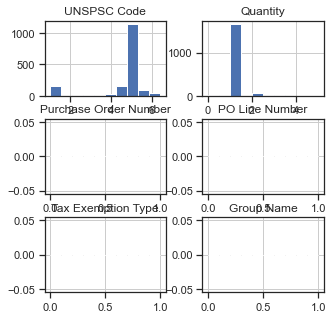

In [117]:
df.hist(figsize=(5,5));

<b>Comment</b>: Nothing useful to conclude from the histograms above.

<h4><p style="text-align: center;">Checking for duplicates</p></h4>

In [118]:
df[df.duplicated(keep=False)].sort_values(by='Order ID')


,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Shipment Date,Shipping Address Name,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name


I need to understand what makes a possible pair of duplicates distinct. Below is a set of items that appears to be the same at first glance, but we did check for duplicated and the result is none.
It appears that the distinct feature is the Carrer Name & Tracking Number. After checking the actual Amazon order page, I can see that those indeed are two separate items.

In [119]:
df.query('Seller=="AKA Ventures"')

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Shipment Date,Shipping Address Name,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
1748,12/12/20,111-3337395-3307449,22oz Christmas Stemless Wine Glass (I Love You...,DRINKING_CUP,B08FQZX8M2,52150000.0,Amazon.com,NaN,new,AKA Ventures,NaN,$0.00,$14.99,1,Visa - 5432,NaN,NaN,12/12/20,Tatiana Tikhonova,NaN,BROOKLYN,NY,11235-4541,Shipped,USPS(9361289714309010909423),$14.99,$1.33,$16.32,False,NaN,False,Tatiana,USD,NaN
1749,12/12/20,111-3337395-3307449,22oz Christmas Stemless Wine Glass (I Love You...,DRINKING_CUP,B08FQZX8M2,52150000.0,Amazon.com,NaN,new,AKA Ventures,NaN,$0.00,$14.99,1,Visa - 5432,NaN,NaN,12/12/20,Tatiana Tikhonova,NaN,BROOKLYN,NY,11235-4541,Shipped,USPS(9361289714309010946220),$14.99,$1.33,$16.32,False,NaN,False,Tatiana,USD,NaN


<h4><p style="text-align: center;">Looking into missing values</h4>

In [120]:
df.isnull().sum().sum()

16103

In [121]:
df[pd.isnull(df['Category'])]['Order Date'].count()
#how many rows have no Category

123

In [122]:
def nans(df): return df[df.isnull().any(axis=1)]
'''shows rows containing ANY missing value'''
nans(df)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Shipment Date,Shipping Address Name,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,09/01/12,103-1139869-5053044,Oster OGG3701 .7-Cubic Foot 700-Watt Digital M...,MICROWAVE_OVEN,B003MGJ17W,52141502.0,Amazon.com,NaN,new,NaN,NaN,$99.99,$75.95,1,Visa - 8154,NaN,NaN,09/04/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,UPS(1Z5932560354547139),$75.95,$0.00,$75.95,NaN,NaN,NaN,Tatiana,USD,NaN
1,09/01/12,103-3853417-2197020,NaN,NaN,B004T3C9LW,NaN,Amazon.com,NaN,new,toolboxsupply,NaN,$8.39,$8.39,1,Visa - 8154,NaN,NaN,09/06/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,FedEx(350429315863582),$8.39,$0.74,$9.13,NaN,NaN,NaN,Tatiana,USD,NaN
2,09/01/12,103-4722613-4495433,Betty Dain Hipster Collection Mold Resistant S...,CURTAIN,B00385WMIM,53131600.0,Amazon.com,NaN,new,Amazon.com,NaN,$4.95,$4.57,1,Visa - 8154,NaN,NaN,09/05/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,USPS(9102901001298424830061),$4.57,$0.41,$4.98,NaN,NaN,NaN,Tatiana,USD,NaN
3,09/01/12,103-4722613-4495433,Munchkin Five Multi Cups,DRINKING_CUP,B0035ER4WU,56101800.0,Amazon.com,NaN,new,Amazon.com,NaN,$4.99,$3.99,1,Visa - 8154,NaN,NaN,09/05/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,USPS(9102901001298424830061),$3.99,$0.35,$4.34,NaN,NaN,NaN,Tatiana,USD,NaN
4,09/01/12,103-4722613-4495433,Ecolution Kitchen Extras Eco-Friendly Mini Coo...,KITCHEN,B005M8GFGI,52150000.0,Amazon.com,NaN,new,Amazon.com,NaN,$19.99,$19.99,1,Visa - 8154,NaN,NaN,09/04/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,FEDEX(9611804837105428061049),$19.99,$1.77,$21.76,NaN,NaN,NaN,Tatiana,USD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,12/27/20,112-2219066-4665835,"Huggies Natural Care Sensitive Baby Wipes, Uns...",HEADPHONES,B07M6XVCBY,53131624.0,Amazon.com,NaN,new,Amazon.com,NaN,$15.99,$13.12,1,Gift Certificate/Card and Visa - 5432,NaN,NaN,12/29/20,Tatiana Tikhonova,NaN,BROOKLYN,NY,11235-4541,Shipped,UPS(1Z282V1R0393569311),$13.12,$1.11,$14.23,False,NaN,False,Tatiana,USD,NaN
1772,12/28/20,114-7555147-5444268,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,B00EI673B6,10111303.0,Amazon.com,NaN,new,Amazon.com,NaN,$23.99,$23.99,1,Visa - 5432,NaN,NaN,01/07/21,Tatiana Tikhonova,NaN,BROOKLYN,NY,11235-4541,Shipping soon,NaN,$23.99,$2.02,$26.01,False,NaN,False,Tatiana,USD,NaN
1773,12/28/20,112-5982617-3884222,ensky Howl's Moving Castle Finished Washing Ji...,PUZZLES,B003UTGIUE,60141105.0,Amazon.com,NaN,new,Fun Fun Hobby Japan!,NaN,$34.99,$44.99,1,Visa - 5432,NaN,NaN,12/29/20,Tatiana Tikhonova,NaN,BROOKLYN,NY,11235-4541,Shipped,UPS(1Z9743XV0230264994),$44.99,$3.99,$48.98,False,NaN,False,Tatiana,USD,NaN
1774,12/30/20,111-1980502-0925852,Daisysboutique Men's Holiday Reindeer Snowman ...,SWEATER,B01GOA0IOC,53100000.0,Amazon.com,NaN,new,*daisysboutique*,NaN,$59.99,$32.95,1,Visa - 5432,NaN,NaN,01/02/21,Tatiana Tikhonova,NaN,BROOKLYN,NY,11235-4541,Shipped,LASERSHIP(LX82518839),$32.95,$0.00,$32.95,NaN,NaN,NaN,Tatiana,USD,NaN


In [123]:
df.columns[df.isnull().sum()/len(df) > .75]

Index(['Release Date', 'Seller Credentials', 'Purchase Order Number', 'PO Line Number', 'Shipping Address Street 2', 'Tax Exemption Applied', 'Tax Exemption Type', 'Exemption Opt-Out', 'Group Name'], dtype='object')

In [124]:
set(df.columns[df.isnull().mean()==0]) 

{'ASIN/ISBN',
 'Buyer Name',
 'Condition',
 'Currency',
 'Item Subtotal',
 'Item Subtotal Tax',
 'Item Total',
 'List Price Per Unit',
 'Order Date',
 'Order ID',
 'Payment Instrument Type',
 'Purchase Price Per Unit',
 'Quantity',
 'Shipping Address Name',
 'Website'}

In [125]:
df.Condition.nunique()

3

In [126]:
df.Condition.unique()

array(['new', 'used verygood', 'used good'], dtype=object)

**Plot some exploratory visuals**

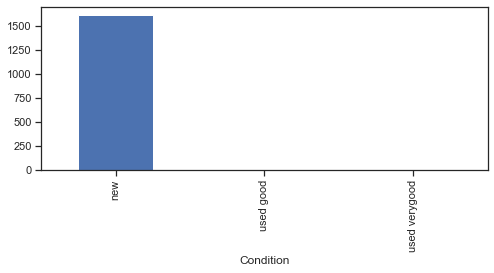

In [203]:
df.groupby('Condition')['Order ID'].count().plot.bar(figsize=(8,3));

<b>Comment</b>: we can see that all of the purchases fall into the New category.

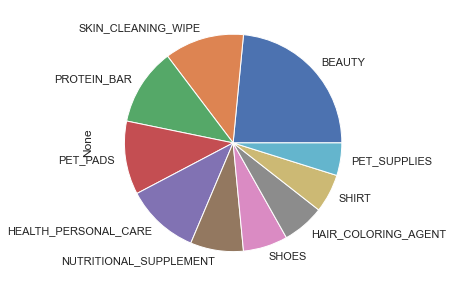

In [204]:
df.groupby('Category').size().sort_values(ascending=False)[:10].plot.pie(figsize=(5,5));

<b>Comment</b>: it looks like Beauty expenses prevailed.

## 3. Data Preparation. <a name="s3"></a> 

<h4>Quality issues to address</h4>

* Drop extra columns we won't need
* Change 'Order Date' format to DateTime
* Extract Year into a separate column
* Format 'Item Total'
* Drop or impute missing values
* Give data more appropriate labels

<h4>Drop extra columns we won't need</h4>


In [129]:
def dropit(x):
    '''Drops selected column on axis 1'''
    df.drop(x,axis=1,inplace=True)
    return df.head(1)

In [130]:
help(dropit)

Help on function dropit in module __main__:

dropit(x)
    Drops selected column on axis 1



In [131]:
dropit(['ASIN/ISBN','UNSPSC Code','Website','Release Date','Seller Credentials','Payment Instrument Type','Purchase Order Number','PO Line Number','Carrier Name & Tracking Number','Tax Exemption Applied','Tax Exemption Type','Exemption Opt-Out'])

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Purchase Price Per Unit,Quantity,Shipment Date,Shipping Address Name,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Item Subtotal,Item Subtotal Tax,Item Total,Buyer Name,Currency,Group Name
0,09/01/12,103-1139869-5053044,Oster OGG3701 .7-Cubic Foot 700-Watt Digital M...,MICROWAVE_OVEN,new,NaN,$99.99,$75.95,1,09/04/12,Tatiana Tikhonova,Brooklyn,New York,New York,11235,Shipped,$75.95,$0.00,$75.95,Tatiana,USD,NaN


In [132]:
dropit(['Shipping Address Name','Shipping Address Street 2','Shipping Address City','Shipping Address State','Shipping Address Zip'])

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Purchase Price Per Unit,Quantity,Shipment Date,Order Status,Item Subtotal,Item Subtotal Tax,Item Total,Buyer Name,Currency,Group Name
0,09/01/12,103-1139869-5053044,Oster OGG3701 .7-Cubic Foot 700-Watt Digital M...,MICROWAVE_OVEN,new,NaN,$99.99,$75.95,1,09/04/12,Shipped,$75.95,$0.00,$75.95,Tatiana,USD,NaN


In [133]:
dropit(['Group Name','Item Subtotal Tax','Item Subtotal','Purchase Price Per Unit','Purchase Price Per Unit'])

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency
0,09/01/12,103-1139869-5053044,Oster OGG3701 .7-Cubic Foot 700-Watt Digital M...,MICROWAVE_OVEN,new,NaN,$99.99,1,09/04/12,Shipped,$75.95,Tatiana,USD


<h4>Change 'Order Date' format to DateTime</h4>

In [134]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [135]:
df.head(1)

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency
0,2012-09-01,103-1139869-5053044,Oster OGG3701 .7-Cubic Foot 700-Watt Digital M...,MICROWAVE_OVEN,new,NaN,$99.99,1,09/04/12,Shipped,$75.95,Tatiana,USD


<h4>Extract Year into a separate column</h4>

In [136]:
df['YearofPurchase']= pd.DatetimeIndex(df['Order Date']).year.astype(np.int64)
df['YearofPurchase'].dtype

dtype('int64')

In [137]:
df = df[df.YearofPurchase != 2021]
#removing 2021 values to make a clean break

<h4>Format 'Item Total'</h4>

In [138]:
df['Item Total'] = df['Item Total'].str.lstrip('$')
df['Item Total'] = pd.to_numeric(df['Item Total'])

In [139]:
df.head(1)

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
0,2012-09-01,103-1139869-5053044,Oster OGG3701 .7-Cubic Foot 700-Watt Digital M...,MICROWAVE_OVEN,new,NaN,$99.99,1,09/04/12,Shipped,75.95,Tatiana,USD,2012


<h4>Drop missing values</h4>

The reason it made sense to drop values instead of imputing them is that the most important columns for our analysis either don't have any missing value ("Item Total" and "Quantity") or have less than 7% ("Category"). The remaining data are less significant and we can afford to drop it, especially since only a small number has a large chunk of information missing.

In [140]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 2 to 1774
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order Date           1623 non-null   datetime64[ns]
 1   Order ID             1623 non-null   object        
 2   Title                1623 non-null   object        
 3   Category             1623 non-null   object        
 4   Condition            1623 non-null   object        
 5   Seller               1623 non-null   object        
 6   List Price Per Unit  1623 non-null   object        
 7   Quantity             1623 non-null   int64         
 8   Shipment Date        1623 non-null   object        
 9   Order Status         1623 non-null   object        
 10  Item Total           1623 non-null   float64       
 11  Buyer Name           1623 non-null   object        
 12  Currency             1623 non-null   object        
 13  YearofPurchase       1623 non-nul

**Give data more appropriate labels**

In [141]:
df.query('Category=="EXERCISE_MAT"')

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
305,2015-06-15,113-1449517-6189849,BalanceFrom GoYoga All-Purpose 1/2-Inch Extra ...,EXERCISE_MAT,new,BalanceFrom,$49.95,1,06/15/15,Shipped,19.95,Tatiana,USD,2015
414,2015-12-18,108-6742885-4709837,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,12/19/15,Shipped,21.22,Tatiana,USD,2015
456,2016-02-14,109-1465626-5512225,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,02/15/16,Shipped,21.76,Tatiana,USD,2016
471,2016-03-20,109-7934772-5337042,Aurorae Classic/Printed Extra Thick and Long 7...,EXERCISE_MAT,new,AURORAE,$54.95,1,03/21/16,Shipped,35.00,Tatiana,USD,2016
472,2016-04-01,109-1884541-9344266,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,04/02/16,Shipped,21.76,Tatiana,USD,2016
493,2016-04-26,110-5614578-0122613,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,04/27/16,Shipped,21.76,Tatiana,USD,2016
502,2016-05-30,106-7570107-1915456,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,05/31/16,Shipped,21.74,Tatiana,USD,2016
512,2016-06-16,116-2814162-5221809,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$37.99,1,06/17/16,Shipped,41.36,Tatiana,USD,2016
523,2016-07-26,106-3262521-9297864,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$37.99,1,07/27/16,Shipped,41.36,Tatiana,USD,2016
545,2016-09-10,112-9975577-8612269,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,2,09/10/16,Shipped,43.52,Tatiana,USD,2016


In [142]:
df[df.Title.str.contains("All-Absorb Extra Large Training Pads", case=False)]


,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
414,2015-12-18,108-6742885-4709837,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,12/19/15,Shipped,21.22,Tatiana,USD,2015
456,2016-02-14,109-1465626-5512225,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,02/15/16,Shipped,21.76,Tatiana,USD,2016
472,2016-04-01,109-1884541-9344266,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,04/02/16,Shipped,21.76,Tatiana,USD,2016
493,2016-04-26,110-5614578-0122613,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,04/27/16,Shipped,21.76,Tatiana,USD,2016
502,2016-05-30,106-7570107-1915456,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,05/31/16,Shipped,21.74,Tatiana,USD,2016
512,2016-06-16,116-2814162-5221809,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$37.99,1,06/17/16,Shipped,41.36,Tatiana,USD,2016
523,2016-07-26,106-3262521-9297864,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$37.99,1,07/27/16,Shipped,41.36,Tatiana,USD,2016
545,2016-09-10,112-9975577-8612269,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,2,09/10/16,Shipped,43.52,Tatiana,USD,2016
561,2016-10-17,110-4253963-2231453,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,10/18/16,Shipped,21.76,Tatiana,USD,2016
583,2016-11-22,110-5395520-1469003,All-Absorb Extra Large Training Pads 28-inch b...,EXERCISE_MAT,new,Amazon.com,$19.99,1,11/23/16,Shipped,21.76,Tatiana,USD,2016


In [143]:
df['Category'][df.Title.str.contains("All-Absorb Extra Large Training Pads", case=False)] = 'PET_PADS'


In [144]:
df[df['Category']=="SKIN_CLEANING_WIPE"] 

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
349,2015-09-05,105-4769739-9480216,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,09/06/15,Shipped,14.12,Tatiana,USD,2015
386,2015-11-13,114-1301383-1841052,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,11/13/15,Shipped,14.14,Tatiana,USD,2015
424,2015-12-27,113-0648423-0572263,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,12/27/15,Shipped,14.12,Tatiana,USD,2015
437,2016-01-26,106-0496704-3163448,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,02/06/16,Shipped,13.71,Tatiana,USD,2016
463,2016-03-05,002-2663055-4528232,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,04/05/16,Shipped,14.06,Tatiana,USD,2016
464,2016-03-05,002-8846380-0657021,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,03/05/16,Shipped,14.12,Tatiana,USD,2016
495,2016-05-01,109-4649585-6157042,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,05/09/16,Shipped,14.03,Tatiana,USD,2016
504,2016-06-01,115-3832708-9910661,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,06/08/16,Shipped,14.06,Tatiana,USD,2016
517,2016-07-01,116-7464753-2393824,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,07/07/16,Shipped,14.06,Tatiana,USD,2016
538,2016-07-30,110-7348799-9250648,"HUGGIES Natural Care Unscented Baby Wipes, Sen...",SKIN_CLEANING_WIPE,new,Amazon.com,$14.99,1,07/31/16,Shipped,13.93,Tatiana,USD,2016


In [145]:
df['Category'][df.Title.str.contains("SKIN_CLEANING_WIPE", case=False)] = 'PET_PADS'



In [146]:
df['Category'][df.Category == 'SKIN_MOISTURIZER'] = "BEAUTY"

In [147]:
df.head(1)

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
2,2012-09-01,103-4722613-4495433,Betty Dain Hipster Collection Mold Resistant S...,CURTAIN,new,Amazon.com,$4.95,1,09/05/12,Shipped,4.98,Tatiana,USD,2012


In [148]:
df.query('Category=="SNACK_FOOD_BAR"')

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
160,2014-02-02,114-5401524-3630634,"Nature Valley Chewy Granola Bars, Peanut Butte...",SNACK_FOOD_BAR,new,Amazon.com,$11.90,1,02/03/14,Shipped,10.72,Tatiana,USD,2014
236,2014-08-19,102-8521512-0499432,"Nature Valley Chewy Granola Bars, Peanut Butte...",SNACK_FOOD_BAR,new,Amazon.com,$16.65,1,08/19/14,Shipped,13.92,Tatiana,USD,2014
246,2014-10-01,103-7735397-8283442,"Nature Valley Greek Yogurt Protein Mixed Bars,...",SNACK_FOOD_BAR,new,Night Tide Sales,$26.86,1,10/01/14,Shipped,18.70,Tatiana,USD,2014
397,2015-11-22,103-9621095-3109819,"Quest Nutrition- High Protein, Low Carb, Glute...",SNACK_FOOD_BAR,new,Amazon.com,$31.95,1,11/23/15,Shipped,23.79,Tatiana,USD,2015
854,2017-08-29,112-5708788-1018666,"Quest Nutrition High Protein, Low Carb, Gluten...",SNACK_FOOD_BAR,new,Amazon.com,$31.99,1,08/30/17,Shipped,23.72,Tatiana,USD,2017
898,2017-10-24,113-9403628-1578632,"Quest Nutrition S'mores Protein Bar, High Prot...",SNACK_FOOD_BAR,new,Amazon.com,$37.88,1,10/25/17,Shipped,24.97,Tatiana,USD,2017
913,2017-11-08,113-6005209-8885828,"Quest Nutrition S'mores Protein Bar, High Prot...",SNACK_FOOD_BAR,new,Amazon.com,$37.88,1,11/09/17,Shipped,24.99,Tatiana,USD,2017
915,2017-11-12,113-4077810-0424222,"Quest Nutrition- High Protein, Low Carb, Glute...",SNACK_FOOD_BAR,new,Amazon.com,$35.88,1,11/13/17,Shipped,23.97,Tatiana,USD,2017
917,2017-11-17,113-2035573-8524207,"Quest Nutrition S'mores Protein Bar, High Prot...",SNACK_FOOD_BAR,new,Amazon.com,$37.88,1,11/17/17,Shipped,24.99,Tatiana,USD,2017
924,2017-11-27,113-0328307-4493810,"Quest Nutrition S'mores Protein Bar, High Prot...",SNACK_FOOD_BAR,new,Amazon.com,$37.88,1,11/28/17,Shipped,21.24,Tatiana,USD,2017


In [149]:
df['Category'][df.Category == "SNACK_FOOD_BAR"] = "PROTEIN_BAR"

## Data Modeling & Result Evaluation<a name="s4"></a>

### How much did I spend by year <a name="s5"></a>

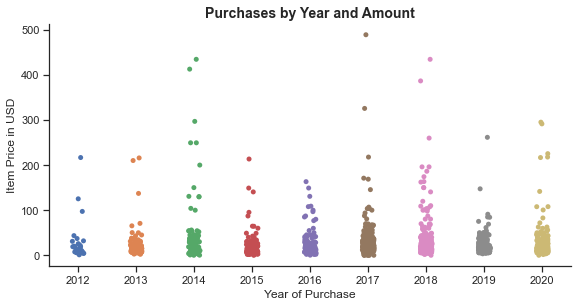

In [150]:
sns.set_style('ticks')
l = sns.catplot(x="YearofPurchase", y="Item Total", data=df,height=4, aspect=2);
l.set_axis_labels("Year of Purchase", "Item Price in USD")
l.ax.set_title("Purchases by Year and Amount", weight='bold').set_fontsize('14');


<b>Comment</b>: Judging by the above, it seems like 2014 and 2017-2018 left their imprint (or rather, a gaping hole) on my wallet, but we’ll need a clearer view to confirm.

### and what year made the largest dent? <a name="s6"></a>

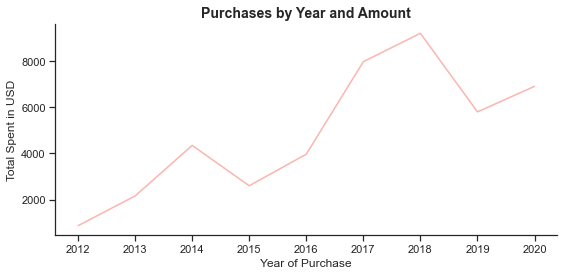

In [151]:
sns.set_style('ticks')
sns.set_palette(['#FBB4AE'])
v1 = sns.relplot(x="YearofPurchase", y="Item Total",height=4, 
                 aspect=2,kind='line',
                 data=df.groupby(by='YearofPurchase').sum(),
                 sizes="Item Total");
v1.ax.set_title("Purchases by Year and Amount",
                weight='bold').set_fontsize('14');
v1.tight_layout(w_pad=0)
v1.set_axis_labels("Year of Purchase", "Total Spent in USD");


<b>Comment</b>: Yes, there it is, 2018 at almost 10K… In my defense, my husband and I frequently buy home appliances on Amazon — but can I actually claim it’s electronics and smart technologies that got the best of me? Let us see…

### What comprised the majority of 2018 purchases? <a name="s7"></a>

In [152]:
grouped_by_year_and_cat = df.groupby(['Category','YearofPurchase'], as_index=False).agg({'Item Total': np.sum, 'Quantity': np.sum, 'YearofPurchase':'first'}).sort_values(by='Item Total',ascending=False)
grouped_by_year_and_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 495 to 607
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        715 non-null    object 
 1   Item Total      715 non-null    float64
 2   Quantity        715 non-null    int64  
 3   YearofPurchase  715 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


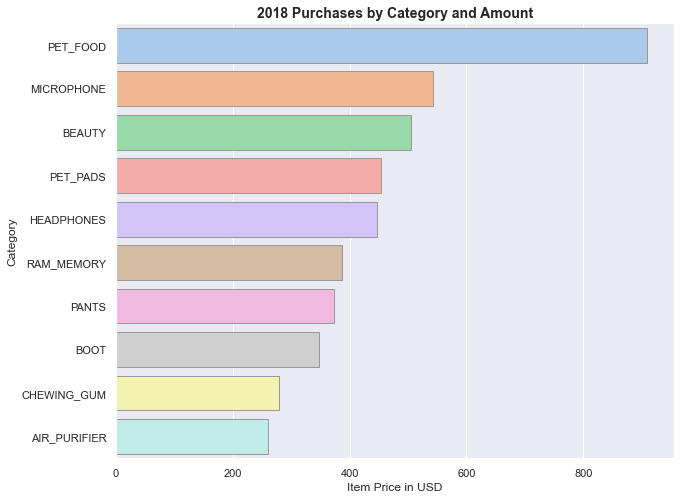

In [153]:
y2018 = grouped_by_year_and_cat.query('YearofPurchase == 2018')
sns.set_theme(style="darkgrid")
sns.barplot(y="Category", x='Item Total', palette="pastel", edgecolor=".6", data=y2018[:10]);
plt.title("2018 Purchases by Category and Amount", weight='bold').set_fontsize('14');
plt.xlabel('Item Price in USD');

<b>Comment</b>: It seems that Pet Food comprised the majority of my 2018 purchased merchandise, followed by electronic devices, beauty, and pet pads.

### Which categories most of my expenses fall into?  <a name="i2"></a>

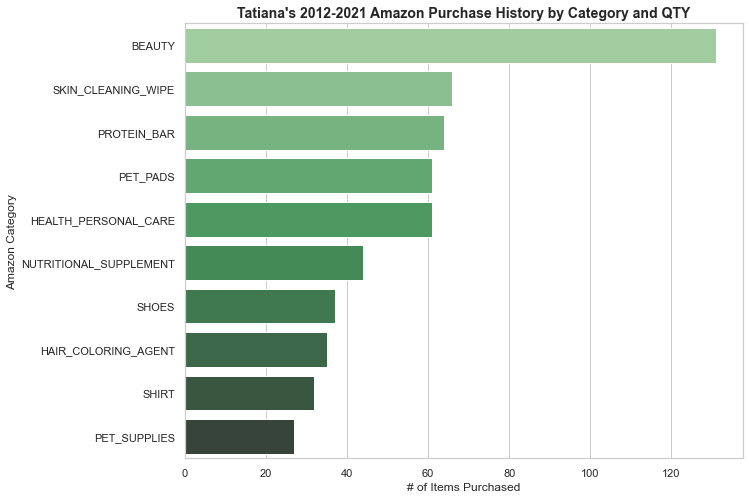

In [154]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="Category",
            data=df,
                   palette="Greens_d",
            order = df['Category'].value_counts().iloc[:10].index);
sns.set(rc={'figure.figsize':(10,8)})
ax.set_title("Tatiana's 2012-2021 Amazon Purchase History by Category and QTY",weight='bold').set_fontsize('14');
ax.set(xlabel="# of Items Purchased", ylabel="Amazon Category");


<b>Comment</b>: if we take Quantity as the basis for our analysis, Beauty, Cleaning Wipes, and Protein Bars make the top 3. Let us see what happends when we see the breakdown by Item Total.

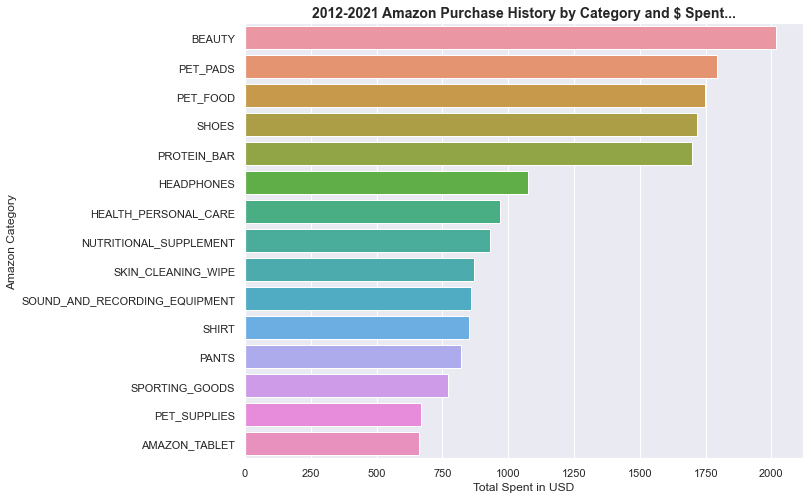

In [155]:
sum_by_cat = df.groupby(['Category'],as_index=False)["Item Total"].sum()
sum_by_cat.sort_values("Item Total",ascending=False, inplace=True)

sns.set(rc={'figure.figsize':(10,8)})
by_cat = sns.barplot(x='Item Total',y='Category',data=sum_by_cat[:15],ci=None);
by_cat.set_title("2012-2021 Amazon Purchase History by Category and $ Spent...",weight='bold').set_fontsize('14');

by_cat.set(xlabel="Total Spent in USD", ylabel="Amazon Category");


<b>Comment</b>: We can see that the category breakdown slightly changes as compared to the QTY view, with Beauty, Pet Pads, and Pet Food making the top 3 most frequently purchased categories.

## If we pick top 10, when was the first time I purchased those products?

In [156]:
by_cat = df.groupby(['Category'], as_index=False).agg({'Item Total': np.sum, 'Quantity': np.sum, 'YearofPurchase':'first'}).sort_values(by='Item Total',ascending=False)
top10 = by_cat.sort_values(by="Item Total",ascending=False)[:10]
top10

,Category,Item Total,Quantity,YearofPurchase
25,BEAUTY,2018.49,141,2013
207,PET_PADS,1792.65,76,2015
206,PET_FOOD,1747.35,26,2014
251,SHOES,1717.03,37,2015
226,PROTEIN_BAR,1699.92,79,2014
139,HEADPHONES,1073.54,16,2014
140,HEALTH_PERSONAL_CARE,970.62,61,2013
189,NUTRITIONAL_SUPPLEMENT,931.77,44,2016
255,SKIN_CLEANING_WIPE,870.46,66,2015
266,SOUND_AND_RECORDING_EQUIPMENT,860.21,5,2014


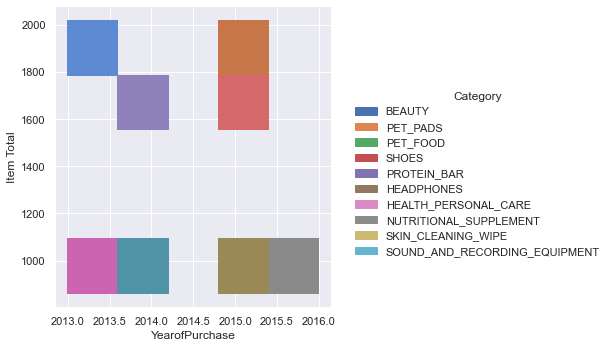

In [157]:
sns.displot(top10, x="YearofPurchase", y='Item Total', hue="Category");


<b>Comment</b>: It looks like I started buying Beauty products in 2013, with Pet Pads in 2015 at the time when I got my second dog, so it makes sense.

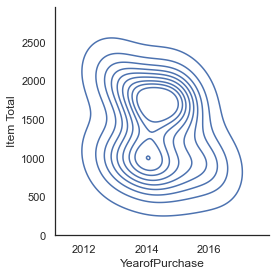

In [158]:
sns.set_theme(style="white")

v2 = sns.displot(
    data=top10,
    x="YearofPurchase",
    y='Item Total',
    kind="kde", height=4, clip=(0, None));

v2.tight_layout(w_pad=0);


<b>Comment</b>: Interestingly, all of my first purchases in these top 10 categories had been made prior to 2017.

In [159]:
by_year = df.groupby(by='YearofPurchase').sum().reset_index()
by_year.loc['Grand Total'] = by_year.sum()

col_list = list(by_year.columns)
for col in col_list: by_year[col] = by_year[col].astype(int)
    
by_year.sort_values(by='YearofPurchase',ascending=False)

,YearofPurchase,Quantity,Item Total
Grand Total,18144,1738,43865
8,2020,278,6914
7,2019,287,5806
6,2018,320,9216
5,2017,315,7986
4,2016,193,3970
3,2015,131,2598
2,2014,95,4351
1,2013,87,2156
0,2012,32,864


### What is the maximum amount I ever spent on most common categories? <a name="i3"></a>

In [160]:
top15 = list(sum_by_cat[:15].Category)
top15

['BEAUTY',
 'PET_PADS',
 'PET_FOOD',
 'SHOES',
 'PROTEIN_BAR',
 'HEADPHONES',
 'HEALTH_PERSONAL_CARE',
 'NUTRITIONAL_SUPPLEMENT',
 'SKIN_CLEANING_WIPE',
 'SOUND_AND_RECORDING_EQUIPMENT',
 'SHIRT',
 'PANTS',
 'SPORTING_GOODS',
 'PET_SUPPLIES',
 'AMAZON_TABLET']

In [161]:
top15_info = df.loc[df['Category'].isin(top15)]
to_compare = list(top15_info.Category.unique())
list(set(top15)-set(to_compare))
#df.loc[df['Category']=='PET_PADS']
#comparing both lists to confirm we're looking at the correct columns

[]

In [162]:
top15_info.sort_values(by='Item Total',ascending=False)

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
258,2014-12-21,115-5203759-9985015,"Fire HDX 8.9 Tablet, 8.9"" HDX Display, Wi-Fi, ...",AMAZON_TABLET,new,Amazon.com,$379.00,1,12/22/14,Shipped,412.64,Tatiana,USD,2014
860,2017-09-03,112-2859248-5866639,Bowflex SelectTech 552 Version 2 | Two Adjusta...,SPORTING_GOODS,new,Amazon.com,$549.00,1,09/04/17,Shipped,325.54,Tatiana,USD,2017
256,2014-11-28,114-2121470-8317009,Westone - Old Model - UM Pro20 High Performanc...,SOUND_AND_RECORDING_EQUIPMENT,new,Amazon.com,$349.99,1,11/29/14,Shipped,296.82,Tatiana,USD,2014
1279,2019-03-07,114-9683298-2805036,Audient iD14 High Performance USB Audio Interface,SOUND_AND_RECORDING_EQUIPMENT,new,Express Music Instruments,$299.00,1,03/07/19,Shipped,261.46,Tatiana,USD,2019
191,2014-04-05,116-9415084-6751466,"Kindle Fire HDX 7"", HDX Display, Wi-Fi, 16 GB ...",AMAZON_TABLET,new,Amazon.com,$229.00,1,04/07/14,Shipped,249.32,Tatiana,USD,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,2017-04-22,112-9737208-8161803,"Q-tips Cotton Swabs, 500 ct",HEALTH_PERSONAL_CARE,new,Amazon.com,$3.61,1,04/23/17,Shipped,3.20,Tatiana,USD,2017
394,2015-11-22,103-7428744-2717831,FREE SAMPLE - CELLUCOR C4 Pre Workout Suppleme...,HEALTH_PERSONAL_CARE,new,Amazon.com,$2.49,1,11/24/15,Shipped,2.69,Tatiana,USD,2015
179,2014-03-08,114-6560801-9670667,5pcs Professional Makeup Make up Cosmetic Brus...,BEAUTY,new,Greatdiscount,$0.00,1,03/11/14,Shipped,0.74,Tatiana,USD,2014
170,2014-03-08,108-0432002-8995436,Revlon Universal Points Sharpener for All Wood...,BEAUTY,new,Treasure House TN,$2.99,1,03/08/14,Shipped,0.02,Tatiana,USD,2014


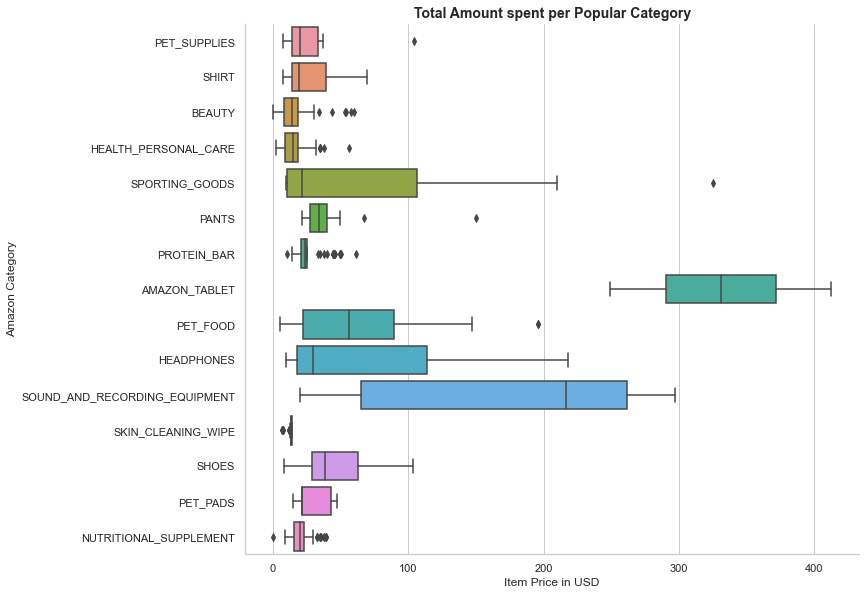

In [163]:
sns.set_theme(style="whitegrid")
sns.catplot(data=top15_info, orient="h", kind="box",y='Category',x='Item Total',height=8, aspect=1.5);
plt.title("Total Amount spent per Popular Category",weight='bold').set_fontsize('14');
plt.rcParams["axes.labelsize"] = 12
plt.xlabel('Item Price in USD');
plt.ylabel('Amazon Category');


<b>Comment</b>: Here we can see some outliers where I made some expensive purchases in the Sporting Goods, Pet Supplies, and Clothes sections. 
It's interesting how the Sporting Goods median falls at somewhere around $20-$30, with maximum being over $200. 
Amazon tablets were the most expensive acquisitions, followed by the Sporting Goods outlier and some Sound Recording devices.

In [164]:
top15_info[top15_info['Category']=='SPORTING_GOODS']

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
111,2013-10-29,106-1027110-8639466,One Pair of Adjustable Dumbbells Kits-200lbs(2...,SPORTING_GOODS,new,NEW COAST LLC,$0.00,1,10/29/13,Shipped,209.99,Tatiana,USD,2013
113,2013-10-29,106-8915471-5577065,Marcy MAT16 4-Piece Puzzle Mat,SPORTING_GOODS,new,Amazon.com,$29.99,1,10/31/13,Shipped,21.76,Tatiana,USD,2013
372,2015-10-03,112-8406301-1668233,Yes4All Premium PVC Yoga Mat (3mm & 5mm) – Mul...,SPORTING_GOODS,new,idzo,$18.00,1,10/04/15,Shipped,10.29,Tatiana,USD,2015
390,2015-11-18,109-5971170-7797061,Rip Toned Lifting Straps (Pair) Wrist Straps f...,SPORTING_GOODS,new,Rip Toned,$19.99,1,11/19/15,Shipped,9.97,Tatiana,USD,2015
412,2015-12-13,113-5098080-2327401,Firm Fit Crossfit Jump Rope - Adult Adjustable...,SPORTING_GOODS,new,Firm Fit,$29.99,1,12/15/15,Shipped,9.94,Tatiana,USD,2015
413,2015-12-13,113-9899769-4774629,POLAR FT4 Heart Rate Monitor,SPORTING_GOODS,new,Heart Rate Monitors USA,$99.95,1,12/14/15,Shipped,64.50,Tatiana,USD,2015
860,2017-09-03,112-2859248-5866639,Bowflex SelectTech 552 Version 2 | Two Adjusta...,SPORTING_GOODS,new,Amazon.com,$549.00,1,09/04/17,Shipped,325.54,Tatiana,USD,2017
861,2017-09-03,112-2859248-5866639,Headphone Adapter Charger Adapter 3.5mm Square...,SPORTING_GOODS,new,Amazon.com,$169.00,1,09/04/17,Shipped,106.69,Tatiana,USD,2017
1316,2019-04-12,113-9732414-4851444,"Riding Crop for Horse (Black, Fuchsia, Pink, o...",SPORTING_GOODS,new,Prairie Horse Supply,$0.00,1,04/12/19,Shipped,10.99,Tatiana,USD,2019


In [165]:
top15_info[top15_info['Category']=='AMAZON_TABLET']

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
191,2014-04-05,116-9415084-6751466,"Kindle Fire HDX 7"", HDX Display, Wi-Fi, 16 GB ...",AMAZON_TABLET,new,Amazon.com,$229.00,1,04/07/14,Shipped,249.32,Tatiana,USD,2014
258,2014-12-21,115-5203759-9985015,"Fire HDX 8.9 Tablet, 8.9"" HDX Display, Wi-Fi, ...",AMAZON_TABLET,new,Amazon.com,$379.00,1,12/22/14,Shipped,412.64,Tatiana,USD,2014


In [166]:
df.sort_values(by='Item Total',ascending=False)

,Order Date,Order ID,Title,Category,Condition,Seller,List Price Per Unit,Quantity,Shipment Date,Order Status,Item Total,Buyer Name,Currency,YearofPurchase
824,2017-07-22,112-6643575-4540215,Nautilus U616 Upright Bike,STATIONARY_BICYCLE,new,Amazon.com,$899.00,1,07/24/17,Shipped,488.85,Tatiana,USD,2017
1046,2018-04-30,113-8164196-6813026,Shure SM7B Cardioid Dynamic Microphone,MICROPHONE,new,Amazon.com,$499.00,1,04/30/18,Shipped,434.41,Tatiana,USD,2018
227,2014-07-03,104-2207639-8869022,"Honeywell MN10CESWW Environmental Appliance, R...",AIR_CONDITIONER,new,Amazon.com,$449.99,1,07/03/14,Shipped,434.40,Tatiana,USD,2014
258,2014-12-21,115-5203759-9985015,"Fire HDX 8.9 Tablet, 8.9"" HDX Display, Wi-Fi, ...",AMAZON_TABLET,new,Amazon.com,$379.00,1,12/22/14,Shipped,412.64,Tatiana,USD,2014
1113,2018-08-11,114-8142111-9339415,CORSAIR VENGEANCE RGB 32GB (4x8GB) DDR4 3000MH...,RAM_MEMORY,new,Amazon.com,$430.99,1,08/13/18,Shipped,386.50,Tatiana,USD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2017-12-04,113-7287394-3866657,Vitamin C 1000mg (per serving) - Airborne Very...,NUTRITIONAL_SUPPLEMENT,new,Amazon.com,$16.49,1,12/04/17,Shipped,0.00,Tatiana,USD,2017
929,2017-12-04,113-9759153-9633050,"Pyure Organic Stevia Sweetener Blend, 2:1 Suga...",SUGAR_SUBSTITUTE,new,Amazon.com,$7.99,1,12/04/17,Shipped,0.00,Tatiana,USD,2017
632,2017-01-07,115-0035876-1368270,"U Brands Paper Clips, Medium 1-1/8-Inch and La...",OFFICE_PRODUCTS,new,Amazon.com,$0.00,1,01/08/17,Shipped,0.00,Tatiana,USD,2017
631,2017-01-07,115-0035876-1368270,Bostitch inSHAPE 15 Reduced Effort Compact Sta...,STAPLER,new,Amazon.com,$12.99,1,01/08/17,Shipped,0.00,Tatiana,USD,2017


## Spread by year of top 6 most expensive categories  <a name="i1"></a>

In [167]:
top6_cols = ['BEAUTY','PET_PADS','PET_FOOD','SHOES','PROTEIN_BAR','HEADPHONES']
top6_info = df.loc[df['Category'].isin(top6_cols)]
list(top6_info.Category.unique()) #checking that proper rows are selected

['BEAUTY', 'PROTEIN_BAR', 'PET_FOOD', 'HEADPHONES', 'SHOES', 'PET_PADS']

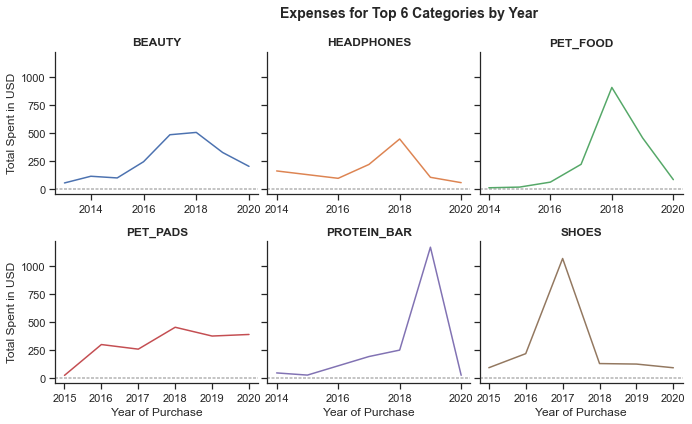

In [168]:
sns.set_theme(style="ticks")

top6_spread = top6_info.groupby(by=['Category','YearofPurchase']).agg({'Item Total':'sum'})

top6_plot = sns.relplot(x="YearofPurchase", y="Item Total", hue="Category",
            height=3, aspect=1.1, facet_kws=dict(sharex=False),
            kind="line", estimator=None, data=top6_spread,
            sizes="Item Total", col='Category',col_wrap=3);
plt.subplots_adjust(top=0.85)
top6_plot.fig.suptitle("Expenses for Top 6 Categories by Year", weight='bold').set_fontsize('14');

(top6_plot.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Year of Purchase", "Total Spent in USD")
  .set_titles("{col_name}",fontweight='bold')
  .tight_layout(w_pad=0))
top6_plot._legend.remove();


<b>Comment</b>: If we limit ourselves to the top 6 categories and see the spread over the whole 8-year period, will my expenses vary from year to year? And the answer is yes, they do vary. Not sure whether this is good or bad news due to apparently unpredictable buyer behavior… I’ll go with the positive approach since I no longer seem to spend a fortune on those protein bars.

In [169]:
set(df.columns)

{'Buyer Name',
 'Category',
 'Condition',
 'Currency',
 'Item Total',
 'List Price Per Unit',
 'Order Date',
 'Order ID',
 'Order Status',
 'Quantity',
 'Seller',
 'Shipment Date',
 'Title',
 'YearofPurchase'}

## Deployment  <a name="k2"></a>
I would say the final stage of our CRISP-DM framework is complete as well. For us, this meant developing and documents a plan for deploying the model, generating a report, and communicating findings to stakeholders. Done, done, and done.

## Taking a stab at predictive modeling <a name="k1"></a>

In [170]:
dfc = df[['Category','Item Total','Order Date', 'Quantity', 'Title','YearofPurchase']].copy()
dfc.head()

,Category,Item Total,Order Date,Quantity,Title,YearofPurchase
2,CURTAIN,4.98,2012-09-01,1,Betty Dain Hipster Collection Mold Resistant S...,2012
3,DRINKING_CUP,4.34,2012-09-01,1,Munchkin Five Multi Cups,2012
4,KITCHEN,21.76,2012-09-01,1,Ecolution Kitchen Extras Eco-Friendly Mini Coo...,2012
5,BABY_PRODUCT,5.98,2012-09-01,1,Munchkin 5 Pack Multi Bowl,2012
6,DISHWARE_PLATE,5.98,2012-09-01,1,"Munchkin Multi Plates, 5 Count",2012


In [171]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 2 to 1774
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        1623 non-null   object        
 1   Item Total      1623 non-null   float64       
 2   Order Date      1623 non-null   datetime64[ns]
 3   Quantity        1623 non-null   int64         
 4   Title           1623 non-null   object        
 5   YearofPurchase  1623 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 168.8+ KB


### Practicing with Dummy Variables

In [172]:
dum = pd.get_dummies(dfc['Category'],dummy_na=False,drop_first=True)

In [173]:
dfc = pd.concat([dfc, dum], axis=1) 

dfc.shape

(1623, 328)

In [174]:
dfc.drop('Order Date',axis=1,inplace=True)


In [175]:
dfc.drop(['Category','Title'],axis=1,inplace=True)
dfc.select_dtypes(include=['object']).sum()

Series([], dtype: float64)

In [176]:
#You can also assume that depending on the month, the expenses on different categories might fluctuate
#varies depending on income, other sites used etc.

In [177]:
X = dfc.drop('Item Total', axis=1)
y = dfc['Item Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
train_score = r2_score(y_train, y_train_preds)
lm_model.score(X_test, y_test,sample_weight=None)

-2.681924681335119e+27

In [178]:
train_score

0.6659809408199404

In [179]:
print(lm_model.intercept_)
#see the intercept of the regression equation

-371.5488822393128


In [180]:
pd.DataFrame(lm_model.coef_, X.columns, columns = ['Coeff'])
# if you hold all other variables constant, then a one-unit increase in Area Population will result in a 15-unit increase in the predicted variable - in this case, Price.

,Coeff
Quantity,1.097949e+01
YearofPurchase,1.871516e-01
ABIS_DRUGSTORE,-5.403599e+00
ACCESSORY,-2.940069e+00
ADHESIVE_TAPES,-1.587983e+15
ADULT_COSTUME,1.880934e+01
AIR_CONDITIONER,-3.710791e+13
AIR_PURIFIER,2.404681e+02
AMAZON_TABLET,3.156196e+02
AMAZON_TABLET_ACCESSORY,2.164625e+01


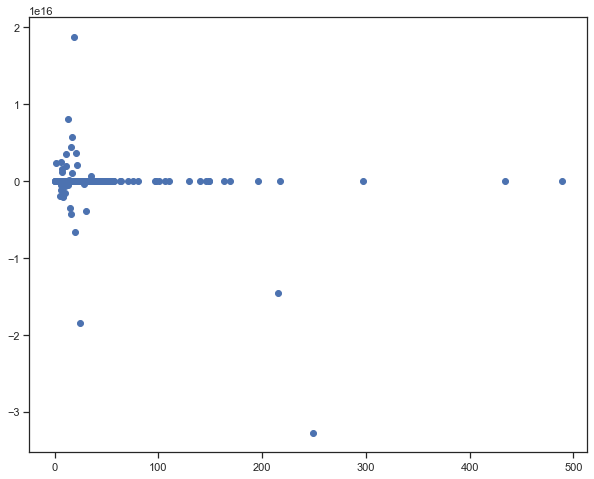

In [181]:
predictions = lm_model.predict(X_test)
plt.scatter(y_test, predictions);

#compare the values of the predictions array with the actual values of y_test.

Plotting model residuals, which are the difference between the actual y-array values and the predicted y-array values.
    

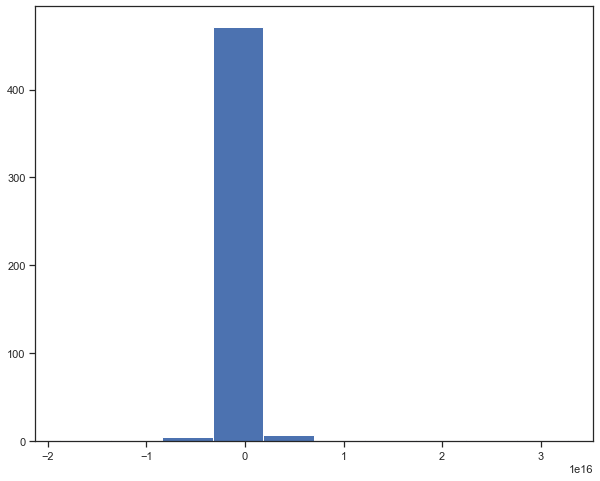

In [182]:
plt.hist(y_test - predictions);

### Adding sample salary values and grouping data by Year of Purchase

In [183]:
#Adding a Sample Salary column with values based on the year of purchase
col=dfc['YearofPurchase']
conditions = [(col.eq(2012)),(col.eq(2013)),(col.eq(2014)),(col.eq(2015)),
            (col.eq(2016)),(col.eq(2017)),(col.eq(2018)),(col.eq(2019)),
            (col.eq(2020))]
choices = [20000,25000,40000,45000,50000,55000,65000,70000,80000]
dfc['Sample_Salary'] = np.select(conditions,choices,default=np.nan)
dfc.sample()

,Item Total,Quantity,YearofPurchase,ABIS_DRUGSTORE,ACCESSORY,ADHESIVE_TAPES,ADULT_COSTUME,AIR_CONDITIONER,AIR_PURIFIER,AMAZON_TABLET,AMAZON_TABLET_ACCESSORY,ANIMAL_HARNESS,APPAREL,APPAREL_BELT,APPAREL_GLOVES,APRON,AREA_DEODORIZER,ARTIFICIAL_PLANT,ART_AND_CRAFT_SUPPLY,AUTO_ACCESSORY,BABY_PRODUCT,BACKPACK,BAKING_PAN,BARBECUE_GRILL,BATHWATER_ADDITIVE,BATTERY,BEAN_BAG_CHAIR,BEAUTY,BEDDING_SET,BED_LINEN_SET,BENCH,BLOOD_PRESSURE_MONITOR,BOARD_GAME,BODY_DEODORANT,BODY_LUBRICANT,BODY_POSITIONER,BONDING_ADHESIVES,BOOKS_1973_AND_LATER,BOOT,BOTTLE,BOXING_GLOVE,BRA,BRACELET,BREAKFAST_CEREAL,CALCULATOR,CAMCORDER,CAMERA_DIGITAL,CAMERA_TRIPOD,CANDLE,CANDLE_HOLDER,CANDY,CARD_STOCK,CARRYING_CASE_OR_BAG,CELLULAR_PHONE,CELLULAR_PHONE_CASE,CEREAL,CHAIR,CHARM,CHEWING_GUM,CHOCOLATE_CANDY,CLEANING_AGENT,CLEANING_BRUSH,CLOCK,COAT,COFFEE,COFFEE_MAKER,COMPUTER,COMPUTER_ADD_ON,COMPUTER_CHASSIS,COMPUTER_COMPONENT,COMPUTER_COOLING_DEVICE,COMPUTER_DRIVE_OR_STORAGE,COMPUTER_INPUT_DEVICE,CONDIMENT,CONDITIONER,CONSUMER_ELECTRONICS,COOKING_POT,CORRECTIVE_EYEGLASSES,COSMETIC_BRUSH,COSMETIC_POWDER,CRACKER,CURTAIN,CURTAIN_FASTENER,CUTTING_BOARD,CUTTING_TOOLS,DAIRY_BASED_CHEESE,DECORATIVE_MAGNET,DESK,DISHWARE_BOWL,DISHWARE_PLATE,DRESS,DRINKING_CUP,DRINKING_STRAW,DRINK_FLAVORED,DRYING_RACK,EARPLUG,EARRING,EDIBLE_OIL_VEGETABLE,ELECTRIC_FAN,ELECTRIC_SHAVER,ELECTRONIC_ADAPTER,ELECTRONIC_CABLE,ELECTRONIC_COMPONENT,ELECTRONIC_COMPONENT_FAN,EXERCISE_MAT,EYEBROW_COLOR,EYELID_COLOR,FACE_SHAPING_MAKEUP,FALSE_EYELASH,FASTENER_DRIVE_BIT,FIGURINE,FINEEARRING,FINENECKLACEBRACELETANKLET,FIRST_AID_KIT,FISH,FITNESS_BENCH,FITTED_SHEET,FLASH_MEMORY,FLAT_SCREEN_DISPLAY_MOUNT,FLAVORED_DRINK_CONCENTRATE,FLOUR,FOOD_BLENDER,FOOD_STORAGE_BAG,GREETING_CARD,GROCERY,GUITARS,HAIRBAND,HAIR_BRUSH,HAIR_CLEANER_CONDITIONER,HAIR_CLIP,HAIR_COLORING_AGENT,HAIR_COMB,HAIR_IRON,HAIR_STYLING_AGENT,HAIR_TIE,HANDBAG,HANGING_ORNAMENT,HANGING_ROD,HARDWARE,HARDWARE_HANDLE,HAT,HEADPHONES,HEALTH_PERSONAL_CARE,HERB,HERBAL_SUPPLEMENT,HOME,HOME_BED_AND_BATH,HOME_LIGHTING_ACCESSORY,ICE_CUBE_TRAY,INPUT_MOUSE,INSTRUMENT_PARTS_AND_ACCESSORIES,JEWELRY_STORAGE,KEYBOARDS,KEYBOARD_INSTRUMENTS,KEYCHAIN,KITCHEN,KITCHEN_KNIFE,LABEL,LAMP,LAUNDRY_DETERGENT,LAUNDRY_HAMPER,LEOTARD,LIP_BALM,LIP_COLOR,LOCK,MASCARA,MASSAGER,MATTRESS,MATTRESS_COVER,MEAL_HOLDER,MEASURING_CUP,MEAT,MECHANICAL_LIGHTER,MEDICAL_TEST_STRIP,MEDICATION,MICROPHONE,MINERAL_SUPPLEMENT,MISC_OTHER,MONEY_BANK,MONITOR,MOUSE_PAD,MOUTHWASH,MP3_PLAYER,MUSCLE_ROLLER,NAIL_POLISH,NECKLACE,NECKTIE,NETWORKING_DEVICE,NETWORKING_ROUTER,NIGHTGOWN_NIGHTSHIRT,NOODLE,NUTRITIONAL_SUPPLEMENT,NUT_AND_SEED,NUT_BUTTER,OFFICE_PRODUCTS,ORTHOPEDIC_BRACE,OUTDOOR_LIVING,OUTDOOR_RECREATION_PRODUCT,PAINT,PANTRY,PANTS,PAPER_TOWEL,PERSONAL_CARE_APPLIANCE,PERSONAL_FRAGRANCE,PEST_CONTROL_DEVICE,PET_APPAREL,PET_BED_MAT,PET_FEEDER,PET_FOOD,PET_PADS,PET_PEST_CONTROL,PET_SUPPLIES,PET_TOY,PHOTOGRAPHIC_FILM,PIERCING_JEWELRY,PILLOW,PILLOWCASE,PLACEMAT,PLANNER,PORTABLE_ELECTRONIC_DEVICE_COVER,PORTABLE_ELECTRONIC_DEVICE_STAND,POTABLE_WATER_FILTER,POULTRY,POWER_BANK,PRECISION_MEASURING,PRINTER,PRINT_COPY_PAPER,PROFESSIONAL_HEALTHCARE,PROTEIN_BAR,PROTEIN_SUPPLEMENT_POWDER,PUPPET,PUZZLES,RAM_MEMORY,RAZOR_BLADE_CARTRIDGE,RECREATION_BALL,RICE_COOKERS,RING,ROBE,ROBOTIC_VACUUM_CLEANER,SAFETY_SUPPLY,SANDAL,SAUCE,SAUTE_FRY_PAN,SCARF,SCISSORS,SCREEN_PROTECTOR,SCREWS,SCULPTURE,SEAFOOD,SEXUAL_WELLNESS,SHAMPOO,SHELF,SHIRT,SHOES,SHOE_ACCESSORY,SHOE_INSERT,SKIN_CLEANING_AGENT,SKIN_CLEANING_WIPE,SKIN_EXFOLIANT,SKIN_FOUNDATION_CONCEALER,SKIN_TREATMENT_MASK,SKIRT,SLEEP_MASK,SLIPPER,SMALL_HOME_APPLIANCES,SNACK_CHIP_AND_CRISP,SOCKS,SOCKSHOSIERY,SOUND_AND_RECORDING_EQUIPMENT,SPORTING_GOODS,SPORT_ACTIVITY_GLOVE,SPORT_MITT,SPORT_RACKET,STANDALONE_STREAMING_MEDIA_PLAYER,STAPLER,STATIONARY_BICYCLE,STICKER_DECAL,STRING_LIGHT,SUGAR_CANDY,SUGAR_SUBSTITUTE,SUNSCREEN,SWEATBAND,SWEATER,SWEATSHIRT,SWIMWEAR,SYSTEM_POWER_DEVICE,TABLE,TABLETOP_GAME,TEA,TELEVISION,TEMPORARY_TATTOO,THERMOMETER,THICKENING_AGENT,TIGHTS,TIRE_VALVE_STEM_CAP,T

In [184]:
dfc.YearofPurchase.unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [185]:
dfc.YearofPurchase.dtype

dtype('int64')

In [186]:
grouped_by_year = dfc.groupby('YearofPurchase', as_index=False).agg({'Item Total': np.sum, 'Quantity': np.sum, 'Sample_Salary':'first'}).sort_values(by='Item Total',ascending=False)
grouped_by_year

,YearofPurchase,Item Total,Quantity,Sample_Salary
6,2018,9216.72,320,65000.0
5,2017,7986.43,315,55000.0
8,2020,6914.84,278,80000.0
7,2019,5806.82,287,70000.0
2,2014,4351.19,95,40000.0
4,2016,3970.40,193,50000.0
3,2015,2598.00,131,45000.0
1,2013,2156.76,87,25000.0
0,2012,864.84,32,20000.0


In [187]:
grouped_by_year.dtypes

YearofPurchase      int64
Item Total        float64
Quantity            int64
Sample_Salary     float64
dtype: object

In [188]:
#Defining the x matrix as well as the reponse vector
X = grouped_by_year.drop('Item Total', axis=1)
y = grouped_by_year['Item Total']

#Splitting the data into train and test (
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

#Instantiating
lm_model2 = LinearRegression(normalize=True) 

#Fitting
lm_model2.fit(X_train, y_train) 

#Predicting using the model
y_test_preds = lm_model2.predict(X_test)
y_train_preds = lm_model2.predict(X_train)

#Scoring using the model
train_score = r2_score(y_train, y_train_preds)
test_score = lm_model2.score(X_test, y_test,sample_weight=None)
predictions = lm_model2.predict(X_test)

#Printing the score along with some other metrics reflecting on the accuract of the model
"train_score {} & test_score {} & MSE {} & RMSE {} & Intercept: {}".format(
    train_score,test_score,metrics.mean_squared_error(y_test, predictions),
np.sqrt(metrics.mean_squared_error(y_test, predictions)),lm_model2.intercept_)

'train_score 0.9428870894184058 & test_score 0.8879867602614251 & MSE 664647.2270449471 & RMSE 815.2589938448683 & Intercept: 6873976.308374596'

In [189]:
pd.DataFrame(lm_model2.coef_, X.columns, columns = ['Coeff'])

,Coeff
YearofPurchase,-3420.825828
Quantity,39.730581
Sample_Salary,0.392604


In [190]:
grouped_by_year['Item Total'].mean()

4873.999999999996

In [191]:
y_test_preds.mean()

4764.740704723634

### Predicted spending for 2021

In [192]:
x_new = pd.DataFrame({'YearofPurchase':2021, 'Quantity':300, 'Sample_Salary':85000}, index=[0])
x_new

,YearofPurchase,Quantity,Sample_Salary
0,2021,300,85000


In [193]:
round(lm_model2.predict(x_new)[0],1)

5777.8

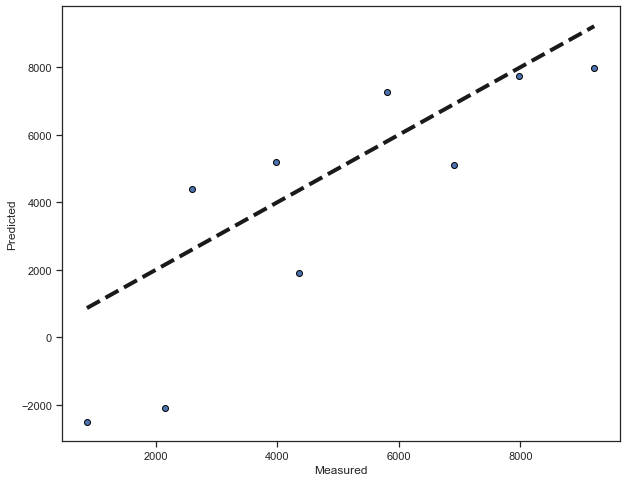

In [194]:
predicted = cross_val_predict(lm_model2, X, y, cv=4)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<b> Comment</b>: We can see that our model fits pretty well.

### Second model with Statsmodels

In [195]:
grouped_by_year['Intercept']=1
lm2 = sm.OLS(grouped_by_year['Item Total'], grouped_by_year[['Intercept', 'YearofPurchase', 'Quantity', 'Sample_Salary']])
results = lm2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Item Total   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     24.05
Date:                Wed, 13 Jan 2021   Prob (F-statistic):            0.00213
Time:                        08:29:09   Log-Likelihood:                -71.405
No. Observations:                   9   AIC:                             150.8
Df Residuals:                       5   BIC:                             151.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.531e+06   2.47e+06      2.236      0.076   -8.28e+05    1.19e+07
YearofPurchase -2752.4966   1231.127     -2.236      0.076   -5917.210     412.216
Quantity          36.5203      8.007      4.561      0.006      15.939      57.102
Sample_Salary      0.3090      0.147      2.096      0.090      -0.070       0.688
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                0.952
Skew:                          -0.568   Prob(JB):                        0.621
Kurtosis:                       1.882   Cond. No.                     4.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
grouped_by_year['sm_preds'] = results.predict()
grouped_by_year.sort_values(by='YearofPurchase')

,YearofPurchase,Item Total,Quantity,Sample_Salary,Intercept,sm_preds
0,2012,864.84,32,20000.0,1,729.992007
1,2013,2156.76,87,25000.0,1,1531.139829
2,2014,4351.19,95,40000.0,1,3705.890092
3,2015,2598.00,131,45000.0,1,3813.152298
4,2016,3970.40,193,50000.0,1,4869.942189
5,2017,7986.43,315,55000.0,1,8117.949817
6,2018,9216.72,320,65000.0,1,8638.111026
7,2019,5806.82,287,70000.0,1,6225.472835
8,2020,6914.84,278,80000.0,1,6234.349906


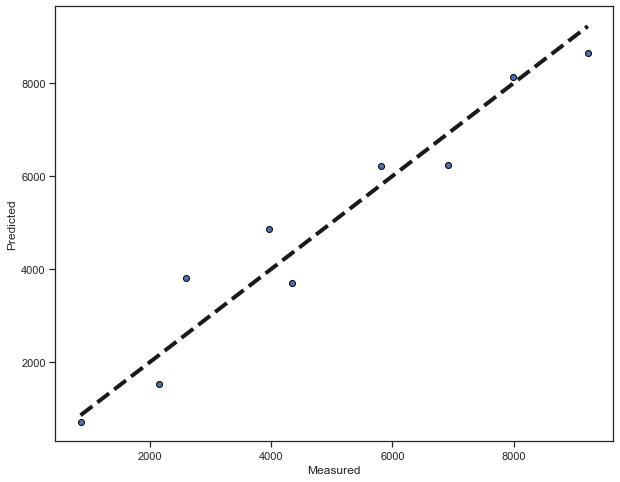

In [197]:
fig, ax = plt.subplots()
y = grouped_by_year['Item Total']
ax.scatter(y, grouped_by_year['sm_preds'], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<b>Comment</b>: This model fits even better,

In [198]:
round(results.predict(pd.DataFrame({'intercept': 1, 
                              'YearofPurchase':2021, 
                              'Quantity':300, 
                              'Sample_Salary':85000},index=[0]))[0],2)

5830.33